In [1]:
# This project uses linear regression to predict the stock price of Microsoft stocks.

from sklearn.linear_model import LinearRegression 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn 
import yfinance as yf
%matplotlib notebook

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
dbs = yf.Ticker("MSFT")

# define 10 years duration of historical data
df = dbs.history(period = "10y")
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-02-25 00:00:00-05:00,23.196134,23.262479,22.698542,22.698542,48011800,0.0,0.0
2013-02-26 00:00:00-05:00,22.706833,22.889285,22.673661,22.698542,49923300,0.0,0.0
2013-02-27 00:00:00-05:00,22.740013,23.221020,22.665374,23.063448,36394700,0.0,0.0
2013-02-28 00:00:00-05:00,23.121493,23.196132,23.005388,23.055147,35840200,0.0,0.0
2013-03-01 00:00:00-05:00,22.988811,23.204435,22.822947,23.179556,34849700,0.0,0.0


<IPython.core.display.Javascript object>


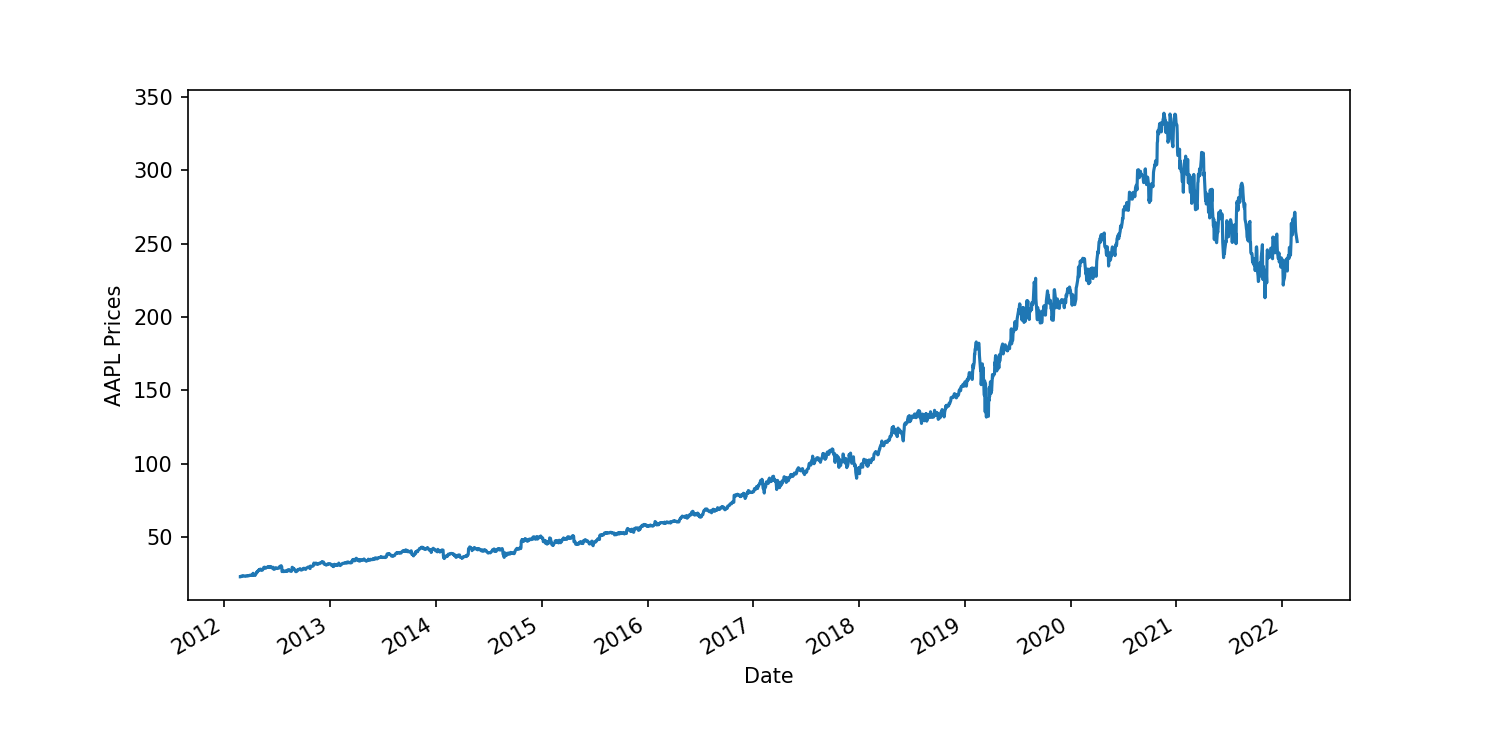

In [ ]:
# Only selects the closing prices.
df=df[['Close']] 
# Gets rid of rows without values.
df= df.dropna() 
# Plots the closing prices
df.Close.plot(figsize=(10,5)) 
plt.ylabel("MSFT Prices")
plt.show()

In [ ]:
# Past three days
df['S_3'] = df['Close'].shift(1).rolling(window=3).mean() 
# Past nine days
df['S_9']= df['Close'].shift(1).rolling(window=9).mean() 
df= df.dropna() 
X = df[['S_3','S_9']] 
X.head()

,S_3,S_9
Date,,
2013-03-08 00:00:00-05:00,23.381350,23.131633
2013-03-11 00:00:00-04:00,23.284596,23.189686
2013-03-12 00:00:00-04:00,23.223780,23.235759
2013-03-13 00:00:00-04:00,23.160197,23.244973
2013-03-14 00:00:00-04:00,23.138081,23.256031


In [ ]:
y = df['Close']
y.head()

Date
2013-03-08 00:00:00-05:00    23.221018
2013-03-11 00:00:00-04:00    23.113201
2013-03-12 00:00:00-04:00    23.146372
2013-03-13 00:00:00-04:00    23.154671
2013-03-14 00:00:00-04:00    23.337122
Name: Close, dtype: float64

In [ ]:
t=.8 
t = int(t*len(df)) 
# Train dataset 
X_train = X[:t] 
y_train = y[:t]  
# Test dataset 
X_test = X[t:] 
y_test = y[t:]

<IPython.core.display.Javascript object>


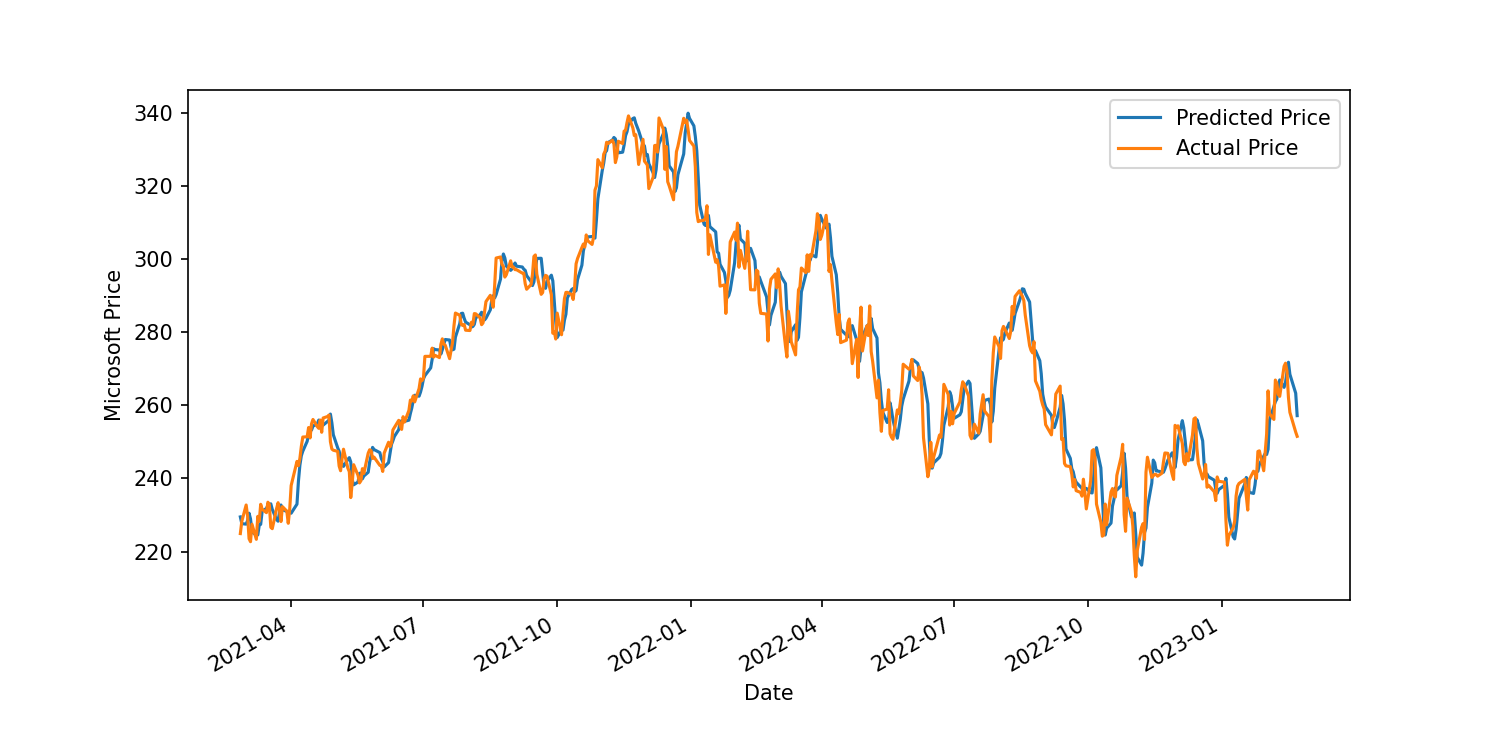

In [ ]:
linear = LinearRegression().fit(X_train, y_train)

predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(predicted_price, index = y_test.index, columns = ['price'])
predicted_price.plot(figsize=(10, 5))
y_test.plot()
plt.legend(['Predicted Price', 'Actual Price'])
plt.ylabel("Microsoft Price")
plt.show()

In [ ]:
#Accuracy of predicted model
r2_score = linear.score(X[t:], y[t:]) * 100 
float("{0:.2f}".format(r2_score)) 

95.96